# Pandas Series

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Series with default index

In [69]:
obj = pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

### Series with specified index

In [9]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [10]:
obj = pd.Series([4,7,-5,3], index=['d','b','a','c'])
obj

d    4
b    7
a   -5
c    3
dtype: int64

In [11]:
obj.index

Index(['d', 'b', 'a', 'c'], dtype='object')

### Selecting values

In [12]:
obj['a']

-5

In [13]:
obj[['a','b','c']]

a   -5
b    7
c    3
dtype: int64

In [15]:
obj['b':]

b    7
a   -5
c    3
dtype: int64

### Numpy like operations

In [11]:
obj[obj>0]

d    4
b    7
c    3
dtype: int64

In [12]:
obj * 10

d    40
b    70
a   -50
c    30
dtype: int64

### Like a dict

In [16]:
'a' in obj

True

In [48]:
d = {'Italy':59320118, 'Netherlands':17084459, 'France':65233271, 'Germany':82521653}
obj = pd.Series(d)
obj

Italy          59320118
Netherlands    17084459
France         65233271
Germany        82521653
dtype: int64

In [72]:
obj = pd.Series(d, index=['Italy','Hungary','Spain','Netherlands','Germany'])
obj

Italy          59320118.0
Hungary               NaN
Spain                 NaN
Netherlands    17084459.0
Germany        82521653.0
dtype: float64

### Sorting

In [73]:
obj.sort_index()

Germany        82521653.0
Hungary               NaN
Italy          59320118.0
Netherlands    17084459.0
Spain                 NaN
dtype: float64

In [78]:
obj.sort_values(ascending = False, inplace = True)

In [79]:
obj

Germany        82521653.0
Italy          59320118.0
Netherlands    17084459.0
Hungary               NaN
Spain                 NaN
dtype: float64

### Missing values

In [55]:
obj.isnull()

Italy          False
Hungary         True
Spain           True
Netherlands    False
Germany        False
dtype: bool

In [58]:
mask = obj.notnull()
list(mask)

[True, False, False, True, True]

In [63]:
obj[obj.notnull()]

Italy          59320118.0
Netherlands    17084459.0
Germany        82521653.0
dtype: float64

In [67]:
obj.fillna(-99999)

Italy          59320118.0
Hungary          -99999.0
Spain            -99999.0
Netherlands    17084459.0
Germany        82521653.0
dtype: float64

In [68]:
obj.dropna()

Italy          59320118.0
Netherlands    17084459.0
Germany        82521653.0
dtype: float64

### Concatenation and update

In [36]:
a = pd.Series({'a':1, 'b':2, 'c':3, 'd':4})
b = pd.Series({'a':10, 'c':30, 'b':20, 'y':40, 'z': 50})
b

a    10
c    30
b    20
y    40
z    50
dtype: int64

In [35]:
b['a':'b']

a    10
c    30
b    20
dtype: int64

In [34]:
b[1:3]

c    30
b    20
dtype: int64

In [29]:
c = pd.Series([22,33,44,55,66], index=[3,4,5,1,2])
c

3    22
4    33
5    44
1    55
2    66
dtype: int64

In [40]:
c.loc[3]

22

In [38]:
c.iloc[3]

55

In [32]:
c[1:3]

4    33
5    44
dtype: int64

In [41]:
co = pd.concat([a,b])
co

a     1
b     2
c     3
d     4
a    10
c    30
b    20
y    40
z    50
dtype: int64

In [42]:
co['a']

a     1
a    10
dtype: int64

In [9]:
a.update(b)
a

a    10
b    20
c    30
d     4
dtype: int64

In [45]:
b.combine_first(a)


a    10.0
b    20.0
c    30.0
d     4.0
y    40.0
z    50.0
dtype: float64

In [46]:
a+b

a    11.0
b    22.0
c    33.0
d     NaN
y     NaN
z     NaN
dtype: float64

### Data and index name

In [47]:
obj.name = 'population'
obj.index.name = 'country'
obj

NameError: name 'obj' is not defined

### Reindexing

In [27]:
obj.index = ['I','H','ES','NL','G']
obj

I     59320118.0
H            NaN
ES           NaN
NL    17084459.0
G     82521653.0
Name: population, dtype: float64

In [28]:
frame = pd.Series([1,2,3,4], index=['a','a','b','c'])
frame

a    1
a    2
b    3
c    4
dtype: int64

In [31]:
frame['a']

a    1
a    2
dtype: int64

In [33]:
frame['b']

3

In [87]:
s = pd.Series([1,2,3,4,5],index=[1,2,5,6,8])
s

1    1
2    2
5    3
6    4
8    5
dtype: int64

In [88]:
s = s.reindex(range(9))
s

0    NaN
1    1.0
2    2.0
3    NaN
4    NaN
5    3.0
6    4.0
7    NaN
8    5.0
dtype: float64

In [69]:
print(s.mean())

4.4


In [65]:
s.reindex(range(9), method='ffill')

0    NaN
1    1.0
2    2.0
3    2.0
4    2.0
5    5.0
6    6.0
7    6.0
8    8.0
dtype: float64

In [70]:
df = pd.DataFrame([[1,2,3,4],[5,6,7,8]])
df

,0,1,2,3
0,1,2,3,4
1,5,6,7,8


In [73]:
df.std()

0    2.828427
1    2.828427
2    2.828427
3    2.828427
dtype: float64

In [80]:
s

0    NaN
1    1.0
2    2.0
3    NaN
4    NaN
5    5.0
6    6.0
7    NaN
8    8.0
dtype: float64

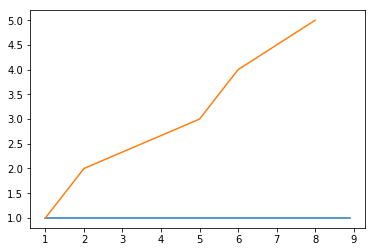

In [102]:
plt.plot(s.reindex(np.arange(1,9,0.1)).interpolate())
plt.plot(s.interpolate())